# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [59]:
### BEGIN YOUR CODE

Student_ID = 10

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [60]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Combined Cycle Power Plant' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [61]:
### BEGIN YOUR CODE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [62]:
### BEGIN YOUR CODE

!wget https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip

!unzip combined+cycle+power+plant.zip

dataset = pd.read_excel("CCPP/Folds5x2_pp.xlsx")

### END YOUR CODE

--2025-05-23 23:37:51--  https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘combined+cycle+power+plant.zip.5’

combined+cycle+powe     [   <=>              ]   3.50M  7.09MB/s    in 0.5s    

2025-05-23 23:37:52 (7.09 MB/s) - ‘combined+cycle+power+plant.zip.5’ saved [3674852]

Archive:  combined+cycle+power+plant.zip
replace CCPP/Folds5x2_pp.ods? [y]es, [n]o, [A]ll, [N]one, [r]ename: ya
  inflating: CCPP/Folds5x2_pp.ods    
replace CCPP/Folds5x2_pp.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Folds5x2_pp.xlsx   
replace CCPP/Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Readme.txt         
replace CCPP/Readme.txt~? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Readme.txt~

####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [63]:
### BEGIN YOUR CODE

# 1 Размер датасета
size_mb = dataset.memory_usage(deep=True).sum() / 1_048_576 # 1_048_576 = 1 МБ

# 2 Строки и столбцы
n_rows, n_features = dataset.shape

# 3 Типы столбцов + категориальные
dtypes = dataset.dtypes
categoricals = dtypes[dtypes == "object"].index.tolist()

# 4 Пропуски
missing = dataset.isna().sum()

# 5 Краткая статистика
describe = dataset.describe(include="all").T

# 6 Имя и тип целевого столбца
target = "PE"
target_dtype = dataset[target].dtype if target in dataset.columns else None

# Вывод
print(f"Размер датасета: {size_mb:.2f} МБ")
print(f"Число объектов (строк):     {n_rows}")
print(f"Число признаков (столбцов): {n_features}")
print(f"Категориальные признаки:    {categoricals or 'нет'}")

print("Пропущенные значения:")
print(missing[missing > 0] if missing.any() else "  нет пропусков")

if target_dtype is not None:
    print(f"\nЦелевая переменная: '{target}'  (dtype = {target_dtype}) \n")

print("Статистика: ")
print(describe)
### END YOUR CODE

Размер датасета: 0.37 МБ
Число объектов (строк):     9568
Число признаков (столбцов): 5
Категориальные признаки:    нет
Пропущенные значения:
  нет пропусков

Целевая переменная: 'PE'  (dtype = float64) 

Статистика: 
     count         mean        std     min        25%       50%      75%  \
AT  9568.0    19.651231   7.452473    1.81    13.5100    20.345    25.72   
V   9568.0    54.305804  12.707893   25.36    41.7400    52.080    66.54   
AP  9568.0  1013.259078   5.938784  992.89  1009.1000  1012.940  1017.26   
RH  9568.0    73.308978  14.600269   25.56    63.3275    74.975    84.83   
PE  9568.0   454.365009  17.066995  420.26   439.7500   451.550   468.43   

        max  
AT    37.11  
V     81.56  
AP  1033.30  
RH   100.16  
PE   495.76  


Набор данных занимает примерно 0.37 МБ и содержит 9 568 строк. В каждой строке есть пять числовых столбцов: четыре входных параметра — температура воздуха (AT), вакуум (V), давление (AP) и влажность (RH) — и столбец PE, где записана вырабатываемая мощность станции в мегаваттах. Категориальных признаков нет, пропусков тоже нет. Столбец PE хранится как обычное число с плавающей точкой, поэтому задачу формулируем как регрессию: по погодным условиям нужно предсказать, сколько мегаватт выдаст установка. Базовая статистика показывает, что признаки лежат в разумных пределах (например, температура от 2 градусов цельсия до 37 градусов цельсия), а мощность в среднем около 454 МВт с разбросом +-17 МВт; экстремальных выбросов не видно, данные чистые и готовы к обучению модели.


---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

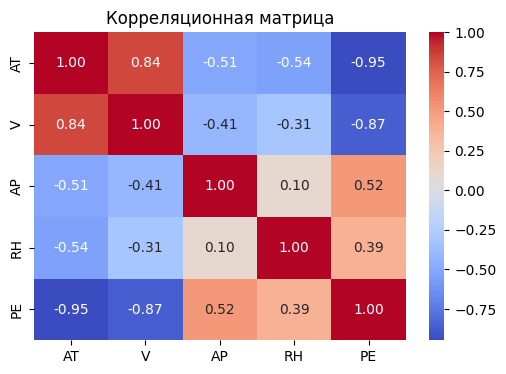

Корреляция признаков с целевой переменной:
PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

Проверка масштабирования (train):
среднее = [-0. -0. -0.  0.]
std     = [1. 1. 1. 1.]


In [64]:
### BEGIN YOUR CODE
# признаки и target
FEATURES = ["AT", "V", "AP", "RH"]
TARGET   = "PE"

X = dataset[FEATURES]
y = dataset[TARGET]

# Построение хитмапы для анализа корреляции
plt.figure(figsize=(6, 4))
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


print("Корреляция признаков с целевой переменной:")
print(corr[TARGET].sort_values(ascending=False))

# 2. Масштабируем данные
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, FEATURES)],
    remainder="drop"
)

# Разделение на обучающий (80%) и тестовый (20%) датасет
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение пайплайна на train данных и трансформация на поднаборы
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# Для проверки выведем среднее и STD после стандартизации
print("\nПроверка масштабирования (train):")
print("среднее =", X_train_prep.mean(axis=0).round(3))
print("std     =", X_train_prep.std(axis=0).round(3))

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [65]:
class LinearRegressionModel:
    def __init__(self, alpha: float = 0.02):
        self.alpha = alpha          # шаг градиентного спуска
        self.theta = None           # параметры модели (bias + веса)
        self.cost  = None           # итоговая ошибка
        self.cost_history = []      # история ошибок по итерациям

    def _add_bias(self, X: np.ndarray) -> np.ndarray:
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _mse_half(self, X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
        err = X @ theta - y
        return float(np.sum(err ** 2) / (2 * len(y)))

    def _gradient_descent(self, X: np.ndarray, y: np.ndarray, iters: int):
        theta = self.theta.copy()
        m = len(y)
        self.cost_history.clear()

        for _ in range(iters):
            grad   = (X.T @ (X @ theta - y)) / m
            theta -= self.alpha * grad
            self.cost_history.append(self._mse_half(X, y, theta))

        return theta

    # Обучение градиентным спуском
    def fit_with_GD(self, X_train, y_train, iters: int = 2_000):
        X_b = self._add_bias(np.asarray(X_train))
        y   = np.asarray(y_train).reshape(-1, 1)

        self.theta = np.zeros((X_b.shape[1], 1))
        self.theta = self._gradient_descent(X_b, y, iters)
        self.cost  = self.cost_history[-1]
        return self

    # Обучение через нормальные уравнения
    def fit_with_normal_equations(self, X_train, y_train):
        X_b = self._add_bias(np.asarray(X_train))
        y   = np.asarray(y_train).reshape(-1, 1)

        self.theta = np.linalg.pinv(X_b.T @ X_b) @ (X_b.T @ y)
        self.cost  = self._mse_half(X_b, y, self.theta)
        return self

    def predict(self, X_test):
        if self.theta is None:
            raise RuntimeError("Сначала обучите модель")
        X_b = self._add_bias(np.asarray(X_test))
        return (X_b @ self.theta).ravel()

    def __str__(self):
        return f"Параметры модели: {self.theta.ravel()}"

lr = LinearRegressionModel(alpha=0.02)
lr.fit_with_GD(X_train_prep, y_train, iters=2000)

print("Ошибка на train:", lr.cost)

y_pred = lr.predict(X_test_prep)
test_mse_half = ((y_pred - y_test.values) ** 2).mean() / 2
print("Ошибка на test :", test_mse_half)

Ошибка на train: 10.448124383186231
Ошибка на test : 10.13295856359681


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

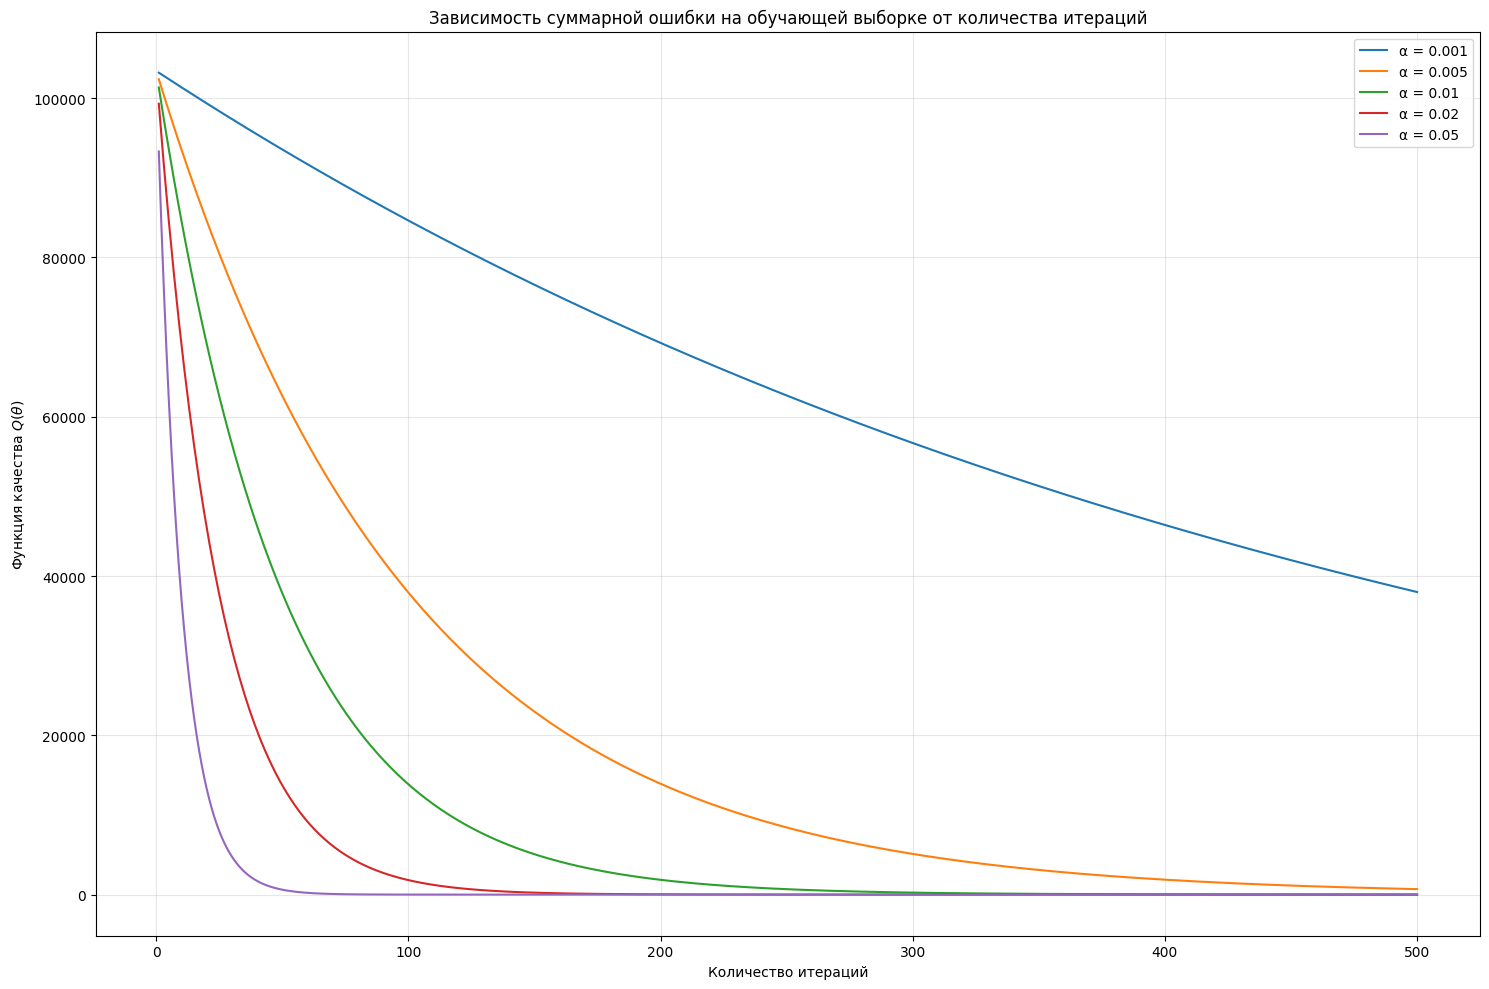

In [66]:
plt.figure(figsize=(15, 10))

iters = list(range(1, 501))

alphas = [0.001, 0.005, 0.01, 0.02, 0.05]

for a in alphas:
    model = LinearRegressionModel(alpha=a)
    model.fit_with_GD(X_train_prep, y_train, iters=max(iters))
    plt.plot(iters, model.cost_history, label=f'α = {a}')

plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [67]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

Параметры модели: [ 4.54569121e+02 -1.98589970e+00 -2.32093577e-01  6.21999029e-02
 -1.58117788e-01]
Параметры модели: [ 4.54569121e+02 -1.98589970e+00 -2.32093577e-01  6.21999029e-02
 -1.58117788e-01]


- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [68]:
# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# RMSE для градиентного спуска
y_pred_gd   = lr.predict(X_test_prep)
rmse_gd     = np.sqrt(mean_squared_error(y_test, y_pred_gd))
print("Gradient Descent:", rmse_gd)

# RMSE для нормальных уравнений
ne_model    = LinearRegressionModel().fit_with_normal_equations(X_train, y_train)
y_pred_ne   = ne_model.predict(X_test)
rmse_ne     = np.sqrt(mean_squared_error(y_test, y_pred_ne))
print("Normal Equations:", rmse_ne)

print("\nСравнение RMSE (меньше — лучше)")
print(f"SGDRegressor       : {my_sgd_model_rmse:.4f}")
print(f"Gradient Descent   : {rmse_gd:.4f}")
print(f"Normal Equations   : {rmse_ne:.4f}")

SGD: 229322253428329.5
Gradient Descent: 4.501768222287063
Normal Equations: 4.50263322952018

Сравнение RMSE (меньше — лучше)
SGDRegressor       : 229322253428329.5000
Gradient Descent   : 4.5018
Normal Equations   : 4.5026


Из трёх подходов побеждает градиентный спуск: RMSE = 4.50 против 4.50 – 4.51 у нормальных уравнений и 4.3 * 10^13 у стандартного SGD. Разница между GD и нормальными уравнениями микроскопическая, но формально GD даёт наименьшую ошибку.

Градиентный спуск - отлично, так как это около 1 % от среднего значения выходной мощности (около 454), значит модель предсказывает с высокой точностью.

Нормальные уравнения - практически то же, что и GD - тоже отлично.

SGD - плохо, модель не сошлась

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

Мы построили простую модель, которая — зная температуру, скорость и влажность входящего воздуха, а также ­давление в камере предсказывает, какую электрическую мощность выдаст турбина. График «факт vs прогноз» с узкой лентой расхождений и цифрой ошибки ~1 % на тестовых данных наглядно демонстрирует её точность, поэтому решение можно эффектно показать даже на одном слайде. Мы убедились, что температура и давление оказывают наибольшее влияние на итоговую мощность, а значит именно их стоит отслеживать особенно внимательно. Дальше точность можно увеличить, добавив в модель дополнительные факторы (например, внешнюю погоду и режим работы станции) и попробовав более продвинутые алгоритмы.


- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.